In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
cols = ['sequence','type']
df = pd.read_csv('../data/sequences_training.txt')
df.columns = cols

In [14]:
u = pd.unique(df['type'])
n = df.nunique(axis = 0)
print(f"unique types {u}")
print(f"number of unique entries in each column:\n{n}")
print(f"value distribution of each type:\n{df['type'].value_counts()}")

unique types ['DNA' 'RNA' 'DRNA' 'nonDRNA']
number of unique entries in each column:
sequence    8794
type           4
seq_len     1285
dtype: int64
nonDRNA    7859
RNA         523
DNA         390
DRNA         22
Name: type, dtype: int64


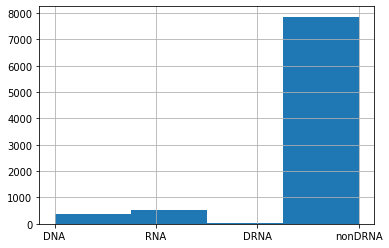

In [5]:
hist = df['type'].hist(bins = 4)

In [6]:
#create histogram based on the length of string sequences
data = df
data['seq_len'] = df['sequence'].str.len()
data

,sequence,type,seq_len
0,MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAP...,DNA,533
1,MAAELAMGAELPSSPLAIEYVNDFDLMKFEVKKEPPEAERFCHRLP...,DNA,353
2,MAAGTAVGAWVLVLSLWGAVVGAQNITARIGEPLVLKCKGAPKKPP...,DNA,404
3,MAAPILFWHRRDLRLSDNIGLAAARAQSAQLIGLFCLDPQILQSAD...,DNA,484
4,MAARKQSSQPSRTPVSYEDVAVSFTQEEWEYLTSTQKTLYQKVMSE...,DNA,421
...,...,...,...
8789,YKVTLKTPSGEETIECPEDTYILDAAEEAGLDLPYSCRAGACSSCA...,nonDRNA,94
8790,YLDHGLGAPAPYPDPLEPRREVCELNPDCDELADHIGFQEAYRRFYGIA,nonDRNA,49
8791,YNSGKLEESFVRGNLERECIEEKCSFEEAREVFENTEKTNEFWKQY...,nonDRNA,409
8792,YPESIDWREKGAVTPVKNQNPCGSCWAFSTVATIEGINKIITGQLI...,nonDRNA,214


This strip plot is used to find a correlation between the type of the sequence and the length of the sequence. 

<AxesSubplot:xlabel='type', ylabel='seq_len'>

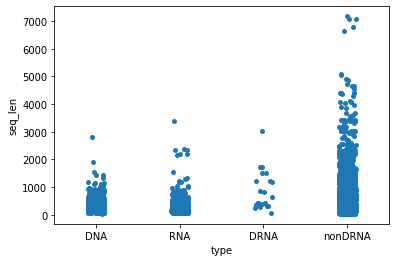

In [7]:
sns.stripplot(x = data['type'], y = data['seq_len'], data = data)

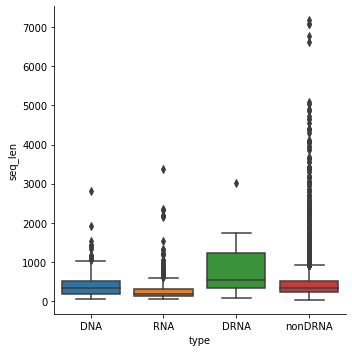

In [13]:
sns.catplot(data = data, x = 'type', y = 'seq_len', kind = "box")